There are various ways to handle missing data:

- Remove any rows that have missing values.
- Remove any columns that have missing values.
- Fill the missing values with some other value.
- Leave the missing values as is.

In [1]:
import pandas as pd
happiness2015 = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/wh_2015.csv")
happiness2016 = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/wh_2016.csv")
happiness2017 = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/wh_2017.csv")

In [2]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

In [3]:
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [4]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [5]:
print(happiness2015.shape)
print(happiness2016.shape)
print(happiness2017.shape)

(164, 13)
(164, 14)
(164, 13)


## Data cleaning workflow

we'll use the following workflow to clean our missing values, starting with checking for errors:

- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

In [6]:
missing_2015 = happiness2015.isnull().sum()
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [7]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [8]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [9]:
missing_2015

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [10]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
combined.shape

(492, 23)

In [12]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

You may have also noticed that some of the column names differ only by punctuation, which caused the dataframes to be combined incorrectly:

In [13]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [14]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

In [15]:
happiness2017.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [16]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [17]:
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

In [18]:
happiness2015.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [19]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [20]:
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

In [21]:
happiness2016.columns

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')

In [22]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

In [23]:
combined

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


In [24]:
missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

## Visualizing missing data

https://seaborn.pydata.org/generated/seaborn.heatmap.html

We can learn more about where these missing values are located by visualizing them with a heatmap, a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the heatmap.

We first reset the index to be the YEAR column so that we'll be able to see the corresponding year on the left side of the heatmap:

In [25]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
combined_updated

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
YEAR,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='YEAR'>

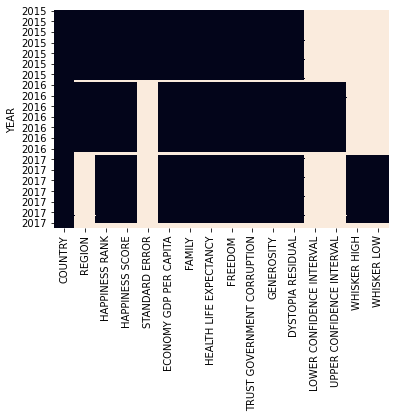

In [26]:
sns.heatmap(combined_updated.isnull(), cbar=False)

We can make the following observations:

- No values are missing in the COUNTRY column.
- There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
- Some columns only have data populated for one year.
- It looks like the REGION data is missing for the year 2017.

In [27]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

In [28]:
missing

164

## Filling missing values

Since the regions are fixed values - the region a country was assigned to in 2015 or 2016 won't change - we should be able to assign the 2015 or 2016 region to the 2017 row.

In order to do so, we'll use the following strategy:

- Create a dataframe containing all of the countries and corresponding regions from the happiness2015, happiness2016, and happiness2017 dataframes.
- Use the pd.merge() function to assign the REGION in the dataframe above to the corresponding country in combined.
- The result will have two region columns - the original column with missing values will be named REGION_x. The updated column without missing values will be named REGION_y. We'll drop REGION_x to eliminate confusion.

In [29]:
regions =  combined_updated[['COUNTRY', 'REGION']]
regions

,COUNTRY,REGION
YEAR,,
2015,Switzerland,Western Europe
2015,Iceland,Western Europe
2015,Denmark,Western Europe
2015,Norway,Western Europe
2015,Canada,North America
...,...,...
2017,Puerto Rico,NaN
2017,Somaliland Region,NaN
2017,Somaliland region,NaN


In [30]:
regions = regions.drop_duplicates(subset=['COUNTRY'])

In [31]:
regions.reset_index(drop=True, inplace=True)
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
159,Namibia,NaN
160,Puerto Rico,NaN
161,Somalia,NaN
162,Somaliland Region,NaN


In [32]:
regions.isnull().sum().sort_values()

COUNTRY    0
REGION     6
dtype: int64

In [33]:
regions.notnull().sum().sort_values()

REGION     158
COUNTRY    164
dtype: int64

In [ ]:
regions.tail(10)

In [34]:
# df.loc[df.Weight == "155", "Name"] = "John"
regions.loc[regions.COUNTRY == 'Namibia', 'REGION'] = 'Sub-Saharan Africa'
regions.loc[regions.COUNTRY == 'Somalia', 'REGION'] = 'Sub-Saharan Africa'
regions.loc[regions.COUNTRY == 'Somaliland Region', 'REGION'] = 'Sub-Saharan Africa'
regions.loc[regions.COUNTRY == 'South Sudan', 'REGION'] = 'Sub-Saharan Africa'
regions.loc[regions.COUNTRY == 'South Sudan', 'REGION'] = 'Sub-Saharan Africa'
regions.loc[regions.COUNTRY == 'Belize', 'REGION'] = 'Latin America and Caribbean'
regions.loc[regions.COUNTRY == 'Puerto Rico', 'REGION'] = 'Latin America and Caribbean'

/Users/brindhamanivannan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-34-12ae935c26ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions.loc[regions.COUNTRY == 'Namibia', 'REGION'] = 'Sub-Saharan Africa'
<ipython-input-34-12ae935c26ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions.loc[regio

In [35]:
regions.tail(10)

,COUNTRY,REGION
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa
157,Togo,Sub-Saharan Africa
158,Belize,Latin America and Caribbean
159,Namibia,Sub-Saharan Africa
160,Puerto Rico,Latin America and Caribbean
161,Somalia,Sub-Saharan Africa
162,Somaliland Region,Sub-Saharan Africa
163,South Sudan,Sub-Saharan Africa


In [36]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  164 non-null    object
 1   REGION   164 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [37]:
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
159,Namibia,Sub-Saharan Africa
160,Puerto Rico,Latin America and Caribbean
161,Somalia,Sub-Saharan Africa
162,Somaliland Region,Sub-Saharan Africa


In [38]:
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined

,COUNTRY,REGION_x,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [39]:
combined = combined.drop('REGION_x', axis = 1)
combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [40]:
missing = combined.isnull().sum()
missing

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION_y                         0
dtype: int64

In [41]:
combined.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'STANDARD ERROR',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'REGION_y'],
      dtype='object')

In [42]:
# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
combined = combined.rename(columns={'REGION_y': 'REGION'})


In [43]:
combined.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'STANDARD ERROR',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'REGION'],
      dtype='object')

## Duplicates

We'll use the DataFrame.duplicated() method to check for duplicate values. If no parameters are specified, the method will check for any rows in which all columns have the same values.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

Since we should only have one country for each year, we can be a little more thorough by defining rows with ONLY the same country and year as duplicates. 

In [44]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])
dups

0      False
1      False
2      False
3      False
4      False
       ...  
487    False
488    False
489    False
490    False
491    False
Length: 492, dtype: bool

In [45]:
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION


Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year.
Keep in mind is that the df.duplicated() method will only look for exact matches, so if the capitalization for country names isn't exactly the same, they won't be identified as duplicates.
To be extra thorough, we can first standardize the capitalization for the COUNTRY column and then check for duplicates again.

In [46]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
dups

0      False
1      False
2      False
3      False
4      False
       ...  
487    False
488    False
489     True
490    False
491    False
Length: 492, dtype: bool

In [47]:
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


We standardized the capitalization of the values in the COUNTRY column and identified that we actually do have three duplicate rows!

In [48]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
90,SOMALILAND REGION,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
260,SOMALILAND REGION,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


Now, we can see that there are two rows for 2015, 2016, and 2017 each.

let's use the df.drop_duplicates() method to drop the duplicate rows. Like the df.duplicated() method, the df.drop_duplicates() method will define duplicates as rows in which all columns have the same values. We'll have to specify that rows with the same values in only the COUNTRY and YEAR columns should be dropped.

It's also important to note that by default, the drop_duplicates() method will only keep the first duplicate row. To keep the last duplicate row, set the keep parameter to 'last'. Sometimes, this will mean sorting the dataframe before dropping the duplicate rows.

In our case, since the second duplicate row above contains more missing values than the first row, we'll keep the first row.



In [49]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [50]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
90,SOMALILAND REGION,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
260,SOMALILAND REGION,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


## Drop columns to handle missing values

Many of the methods in pandas are designed to exclude missing values without removing them, so at this point, we could leave the rest of the missing values as is, depending on the question we're trying to answer.

However, leaving missing values in the dataframe could cause issues with other transformation tasks and change the distribution of our data set. Also note that missing data has to be dropped or replaced to work with machine learning algorithms, so if you're interested in continuing in the data science path, it's important to know how to handle them.

In [51]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
REGION                           0
dtype: int64

- Is the missing data needed to accomplish our end goal?
- How will removing or replacing the missing values affect our analysis?

End Goal: We want to analyze happiness scores and the factors that contribute to happiness scores by year and region.

Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:

- STANDARD ERROR
- LOWER CONFIDENCE INTERVAL
- UPPER CONFIDENCE INTERVAL
- WHISKER HIGH
- WHISKER LOW

In [52]:
combined.head()

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
0,SWITZERLAND,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,ICELAND,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,DENMARK,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,NORWAY,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,CANADA,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America


In [53]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis = 1)
combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION
0,SWITZERLAND,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Western Europe
1,ICELAND,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Western Europe
2,DENMARK,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Western Europe
3,NORWAY,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Western Europe
4,CANADA,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Middle East and Northern Africa
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean


In [54]:
missing = combined.isnull().sum()
missing

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64

df.dropna(axis=1) # drop rows with any missing values

However, this would result in dropping columns with any missing values - we only want to drop certain columns. Instead, we can also use the thresh parameter to only drop columns if they contain below a certain number of non-null values.

In [55]:
combined.notnull().sum().sort_values()

HAPPINESS RANK                 470
HAPPINESS SCORE                470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
HEALTH LIFE EXPECTANCY         470
FREEDOM                        470
TRUST GOVERNMENT CORRUPTION    470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

We dropped columns we don't need for our analysis and confirmed that a couple columns still have missing values:

In [56]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()
missing

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64

## Analyzing missing data

To make a decision about how to handle the rest of the missing data, we'll analyze if it's better to just drop the rows or replace the missing values with other values.

Let's return to the following questions:

- Is the missing data needed to accomplish our end goal?
Yes, we need the data to accomplish our goal of analyzing happiness scores and contributing factors by region and year.

- How will removing or replacing the missing values affect our analysis?
Let's break the second question down into a couple more specific questions:

- What percentage of the data is missing?
- Will dropping missing values cause us to lose valuable information in other columns?
- Can we identify any patterns in the missing data?

Question: What percentage of the data is missing?

As we saw when looking at the results of combined.isnull().sum() above, if missing values exist in a column of our dataframe, they account for about 4 percent of the total values (19 missing out of 489 values per column).

Generally speaking, the lower the percentage of missing values, the less likely dropping them will significantly impact the analysis.

Question: Will dropping missing values cause us to lose valuable information in other columns?

To answer this question, let's visualize the missing data once more. Note below that before we create the heatmap, we first set the index of combined to the REGION column and sort the values:

<AxesSubplot:ylabel='REGION'>

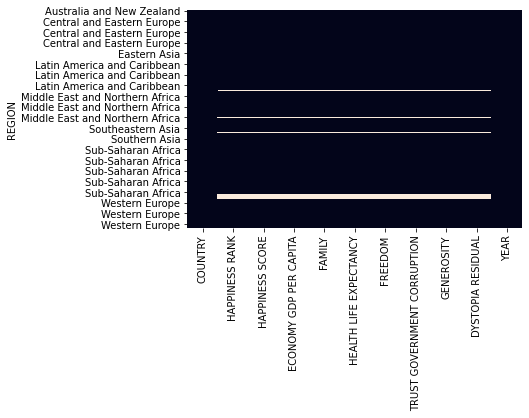

In [57]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

From this visualization, we can confirm that if the data is missing, it's missing in almost every column. We'll conclude that dropping the missing values won't cause us to lose valuable information in other columns.

Question: Can we identify any patterns in the missing data?

From the visualization above, we can also identify that only three regions contain missing values:

- Sub-Saharan Africa
- Middle East and Northern Africa
- Latin America and Carribbean

The Sub-Saharan Africa region contains the most missing values, accounting for about 9 percent of that regions's values. Since we'd like to analyze the data according to region, we should also think about how these values impact the analysis for this region specifically.

## Imputation


Above, we confirmed:

- Only about 4 percent of the values in each column are missing.
- Dropping rows with missing values won't cause us to lose information in other columns.

As a result, it may be best to drop the remaining missing values.

However, before we make a decision, let's consider handling the missing values by replacing them with estimated values, also called imputation.

- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

There are many options for choosing the replacement value, including:

- A constant value
- The mean of the column
- The median of the column
- The mode of the column

For non-numeric columns, common replacement values include the most frequent value or a string like "Unknown" that is used to treat missing values as a separate category.

For numeric columns, it's very common to replace missing values with the mean. Since the rest of the columns in combined with missing data are all numeric, we'll explore this option next.

First, let's build some intuition around this technique by analyzing how replacing missing values with the mean affects the distribution of the data. In order to do so, we'll use the Series.fillna() method to replace the missing values with the mean.

In [60]:
combined['HAPPINESS SCORE']

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
486      NaN
487      NaN
488      NaN
490      NaN
491      NaN
Name: HAPPINESS SCORE, Length: 489, dtype: float64

In [62]:
combined['HAPPINESS SCORE'].fillna(0)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
486    0.000
487    0.000
488    0.000
490    0.000
491    0.000
Name: HAPPINESS SCORE, Length: 489, dtype: float64

In [63]:
happiness_mean = combined['HAPPINESS SCORE'].mean()

In [64]:
happiness_mean

5.370727659882893

In [65]:
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

In [66]:
combined['HAPPINESS SCORE UPDATED'].mean()

5.370727659882894

Did replacing missing values with the mean of a series cause the mean to change? NOOOOO.

## Dropping rows

Recall that when we visualized the missing data, we determined that the Sub-Saharan Africa region contained the most missing values. Since we'd like to analyze the data according to region, let's look more closely at the means for each region:

In [67]:
combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


As a reminder, the All row in the table above represents the mean happiness score for the whole world - the value that we used to replace our missing values. We can see that the world mean happiness score, 5.370728, is over 1 point higher than the mean happiness score for the Sub-Saharan Africa region, 4.150957.

Also, if we think about the reasons why a country may not have participated in the happiness survey - war, natural disaster, etc - many of them would likely result in a lower happiness score than even the region's mean. We'll conclude that the mean for the whole world wouldn't be a good estimate for them.

As a result, we'll decide that of these two options, it's better to drop the rows with missing values. Let's do that next.

In [68]:
combined = combined.dropna()
missing = combined.isnull().sum()
missing

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

We set a more defined data cleaning workflow, in which we:

- Set a goal for the project.
- Researched and tried to understand the data.
- Determined what data was needed to complete our analysis.
- Added columns.
- Cleaned specific data types.
- Combined data sets.
- Removed duplicate values.
- Handled the missing values.

Reference:
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html